# Predicting Cost of Health Insurance

# Introduction

Health insurance is insurance that covers the whole or a part of the risk of a person incurring medical expenses,
spreading the risk over a large number of persons.By estimating the overall risk of health care and health system expenses over the risk pool, an insurer can develop a routine finance structure, such as a monthly premium or payroll tax, 
to provide the money to pay for the health care benefits specified in the insurance agreement.

According to the Health Insurance Association of America, health insurance is defined as "coverage that provides for the payments of benefits as a result of sickness or injury. It includes insurance for losses from accident, medical expense, disability, or accidental death and dismemberment"


Goal of this data processing is to **predict accurately the insurance costs**.


# Dataset

This dataset has 6 variable:

1. Age: age of primary beneficiary.

2. Sex: insurance contractor gender, female, male.

3. BMI: Body mass index, providing an understanding of body,
    weights that are relatively high or low relative to height, 
    objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.

4. Children: Number of children covered by health insurance/Number of dependents.

5. Smoker: Is the person a smoker or not.

6. Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. Charges: It is the target variable. Individual medical costs billed by health insurance.

The dataset is available here: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## reading the dataset

In [60]:
df=pd.read_csv("C:/Users/DELL/OneDrive/Desktop/insurance.csv")

In [61]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1.There are no null values in the dataset
2.All the datatypes are also correct

## To check the missing values

In [65]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1.There is no missing values in this dataset

In [66]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Visualisation

## Univariate Analysis

In [67]:
df.shape

(1338, 7)

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Sex

In [69]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

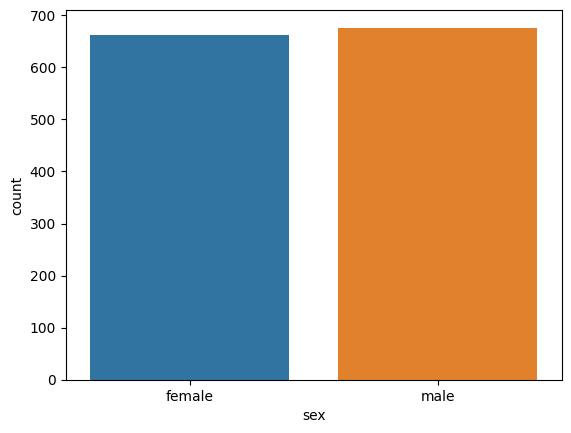

In [70]:
sns.countplot(x='sex',data=df)
plt.show()

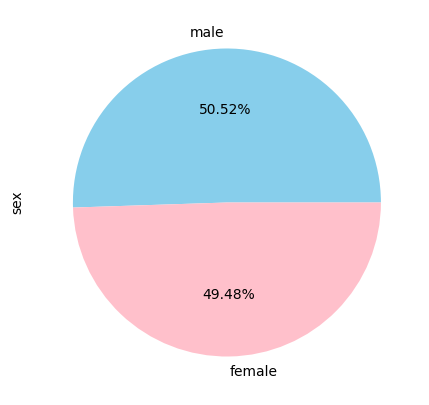

In [71]:
plt.figure(figsize=(10,5))
df['sex'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['SkyBlue','Pink'])
plt.show()

### Age

In [72]:
df['age'].nunique()

47

In [73]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

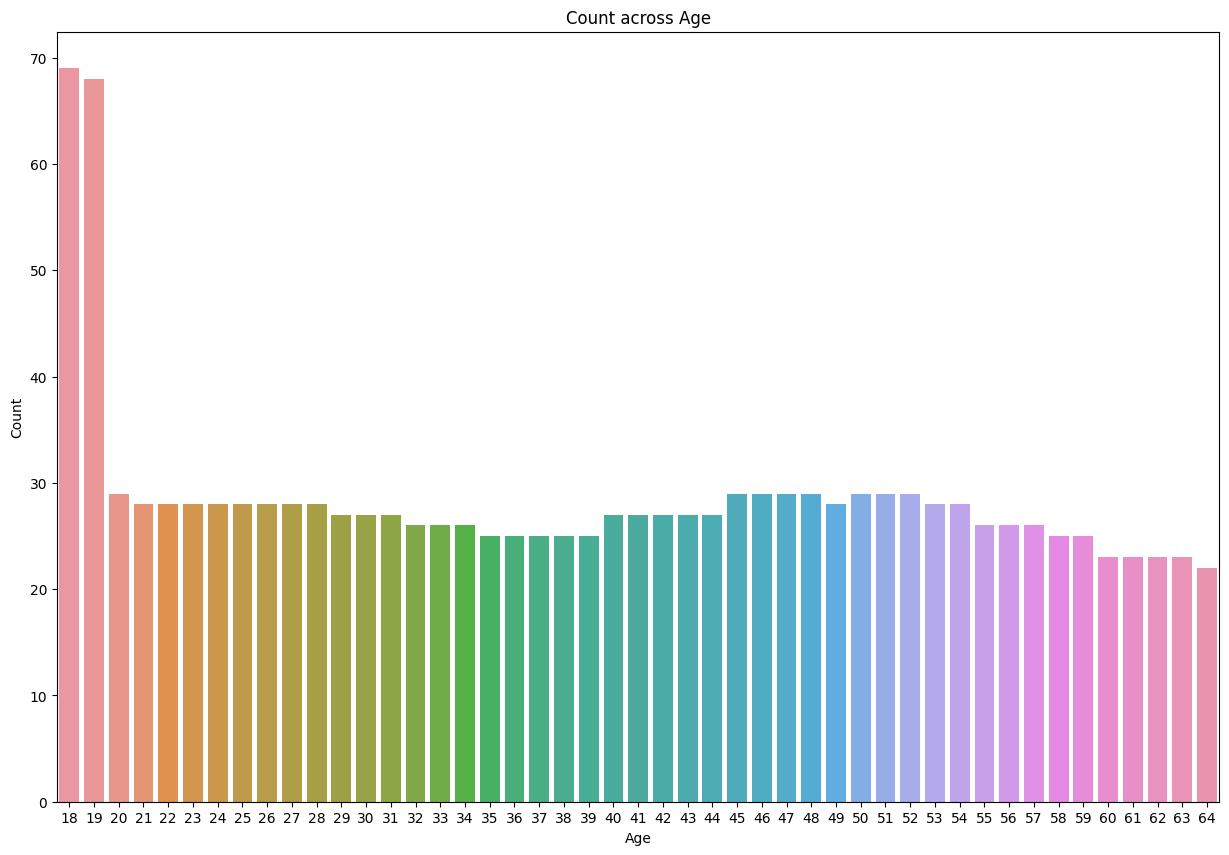

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'age' is a column in it
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='age')
plt.title('Count across Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


From this count plot on age column its shows there is more populatiion people from the age of 18,19 compared to other  age people

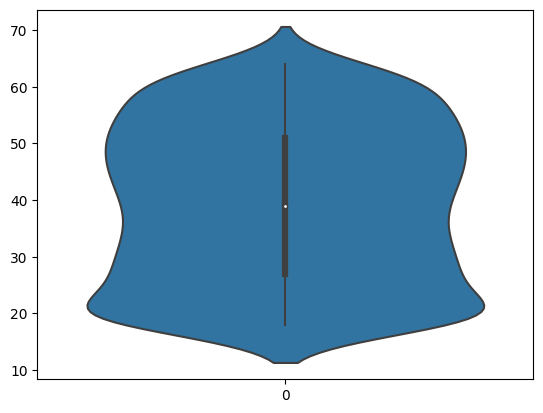

In [75]:
sns.violinplot(df['age'])
plt.show()

# BMI

In [76]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [77]:
df['bmi'].nunique()

548

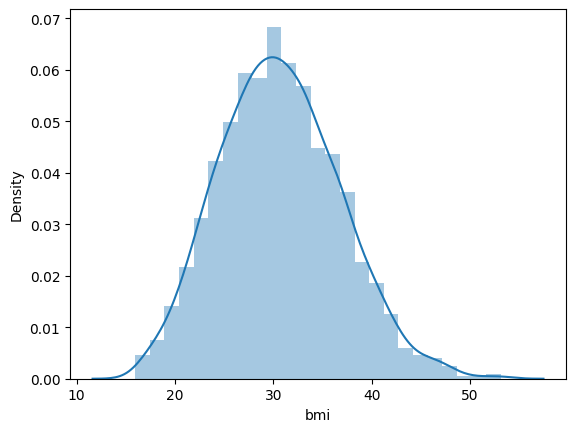

In [78]:
sns.distplot(df['bmi'])
plt.show()

In [79]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Children

In [80]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

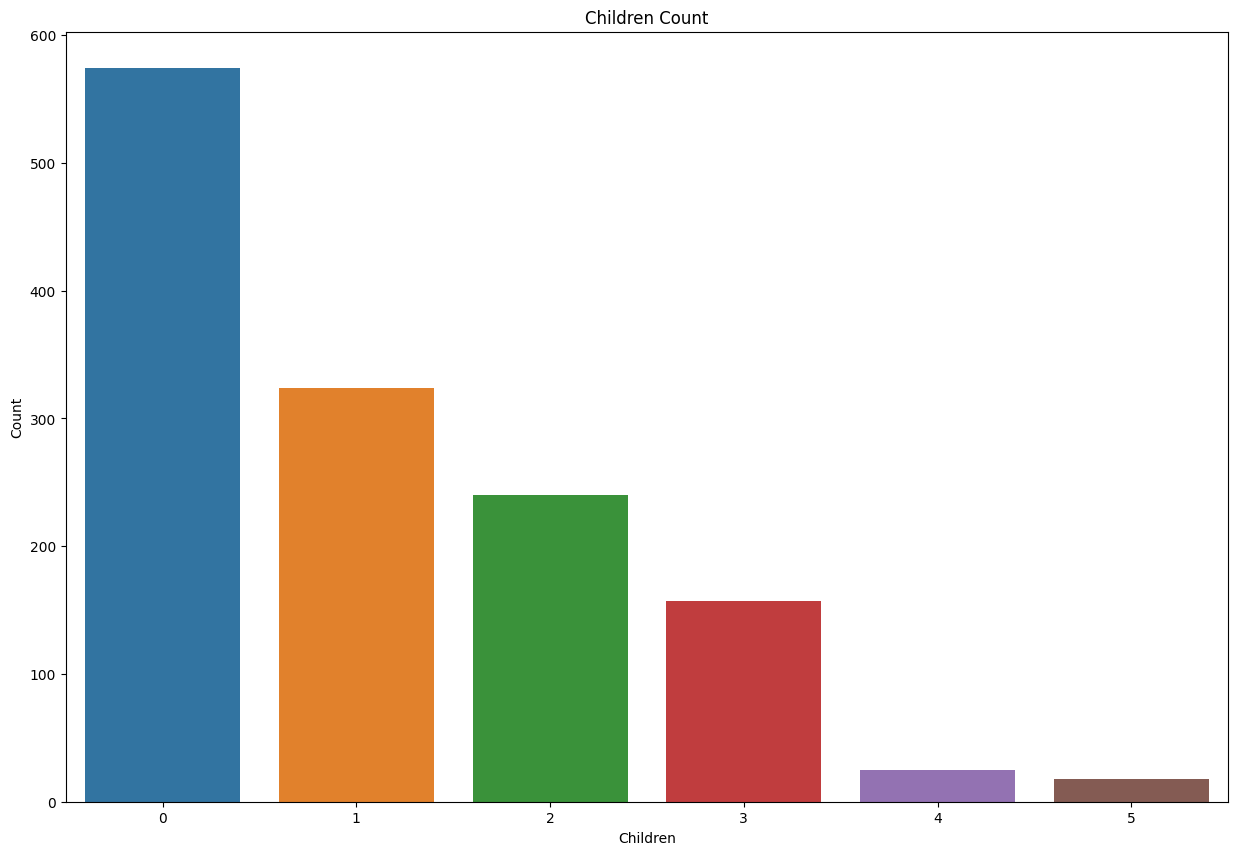

In [81]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='children')
plt.title('Children Count')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()


# Smoker

In [82]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

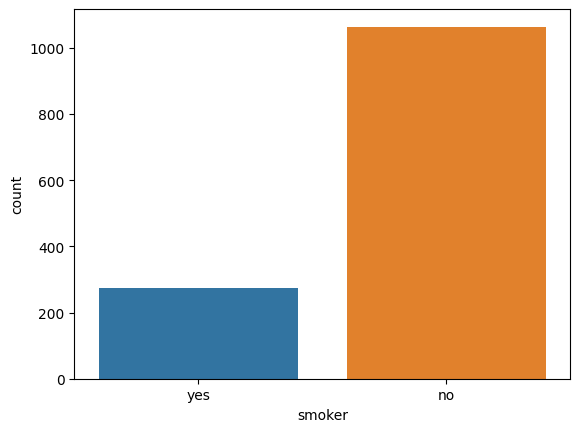

In [83]:
sns.countplot(x=df['smoker'])
plt.show()

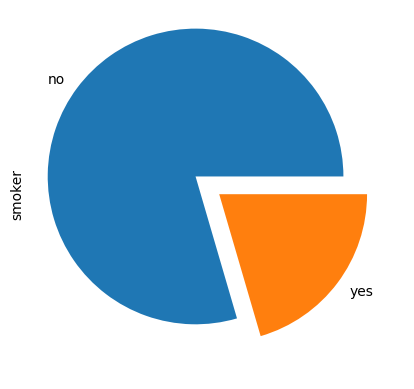

In [84]:
df['smoker'].value_counts().plot(kind='pie',explode=[0.2,0])
plt.show()

# Region

In [85]:
r=df['region'].value_counts()

In [86]:
r

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

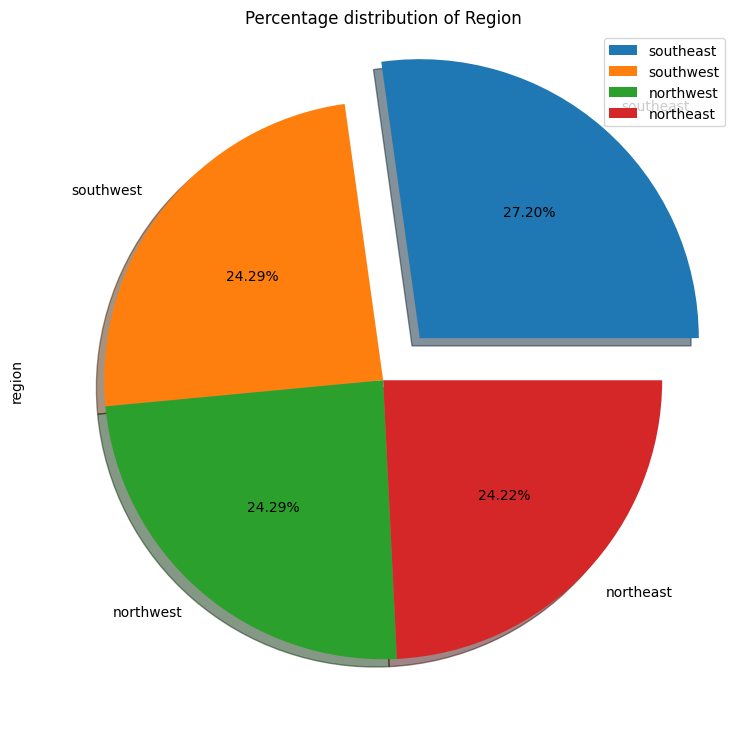

In [87]:
plt.figure(figsize=(9,9.5))
df['region'].value_counts().plot(kind='pie',explode=[0.2,0,0,0],legend=True,autopct='%.2f%%',shadow=True)
plt.title('Percentage distribution of Region')
plt.show()

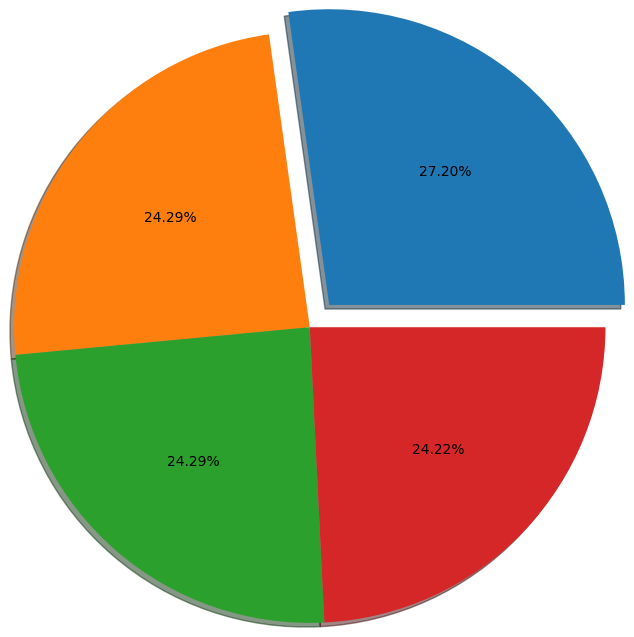

In [88]:
plt.pie(r,data=df,autopct='%.2f%%',explode=[0.2,0,0,0],shadow=True,radius=2)
plt.show()

# Charges
## Target Variable

In [89]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [90]:
len(df['charges'].value_counts())

1337

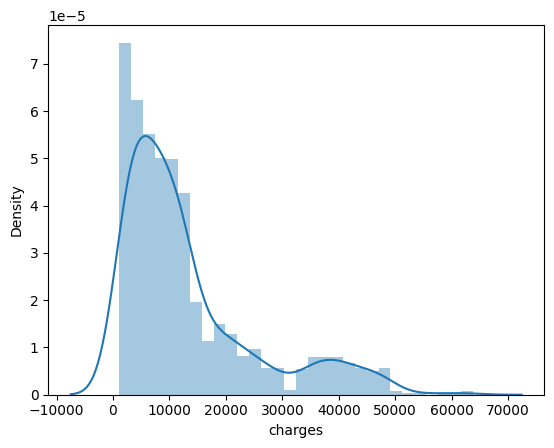

In [91]:
sns.distplot(df['charges'])
plt.show()

# Bivariate Analysis and Multivariate Analysis

# Smoker with Sex

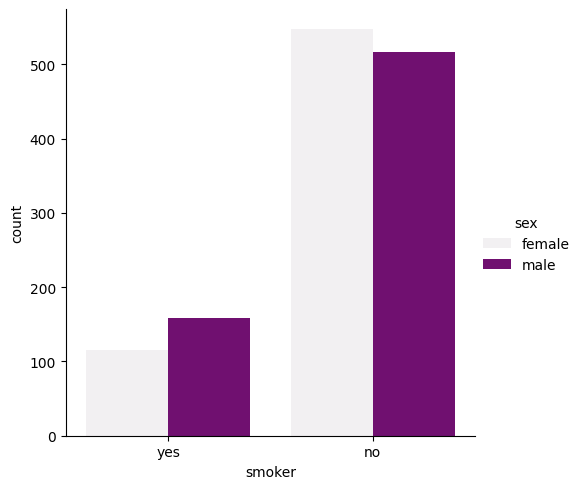

In [92]:
sns.catplot(data=df,x='smoker',kind='count',hue='sex',color='Purple')
plt.show()

## Charges with Smoker

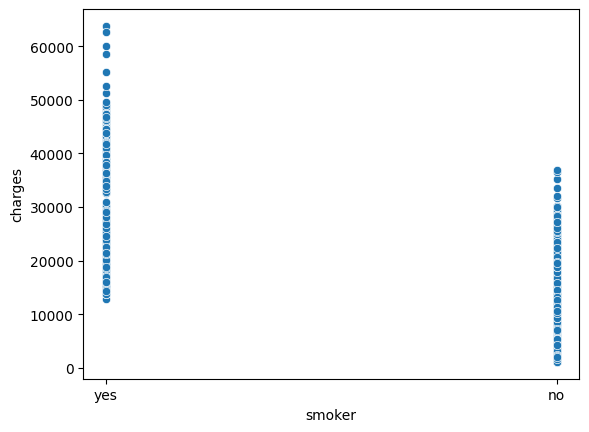

In [93]:
sns.scatterplot(y='charges',x='smoker',data=df)
plt.show()

## Distribution Plot for Age column

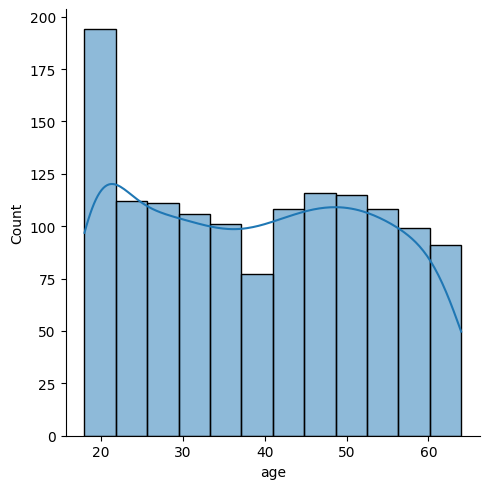

In [94]:
sns.displot(df.age.dropna(axis=0),kde=True)
plt.show()

# Heat Map

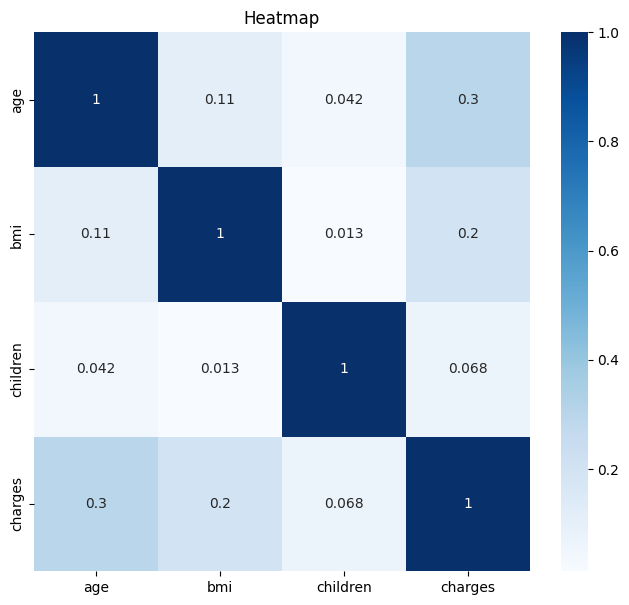

In [95]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title("Heatmap")
plt.show()

In [96]:
df.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

There is a strong correlation betweeen the age and the target variable charges

# Box Plot to check the Outliers

In [97]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

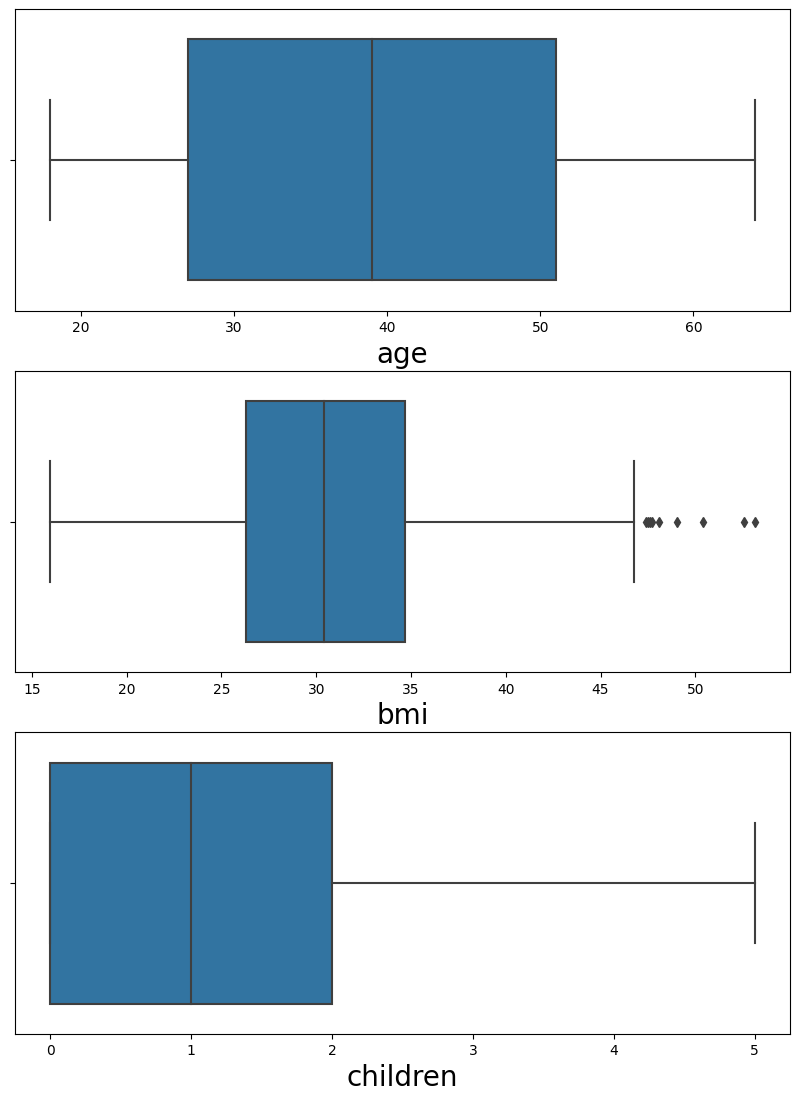

In [98]:
## Lets check outliers in any
box=df[['age','bmi','children']]
plt.figure(figsize=(10,18), facecolor='white')#to sey canvas size
plotnumber = 1#counter

for column in box:
    if plotnumber<=6 : 
        ax = plt.subplot(4,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1#counter increment 
plt.show()

There is outliers in the bmi feature        

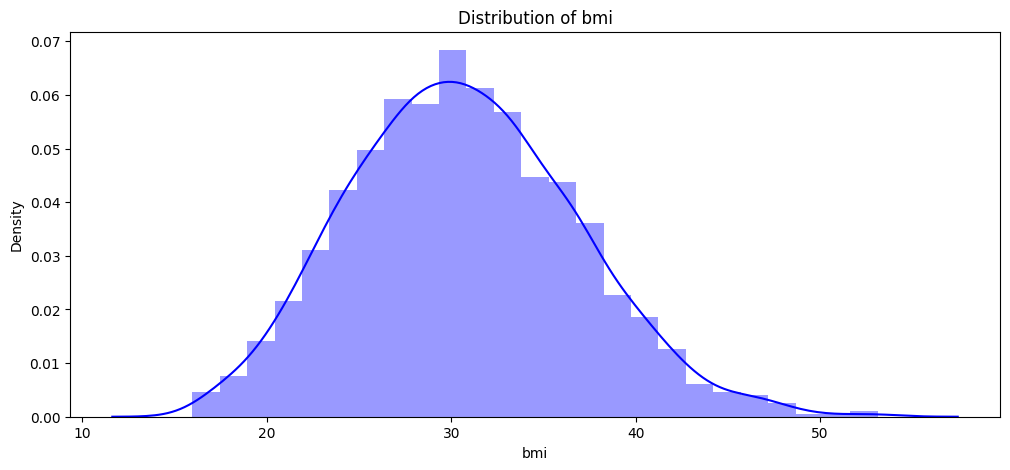

In [99]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'b')

If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.

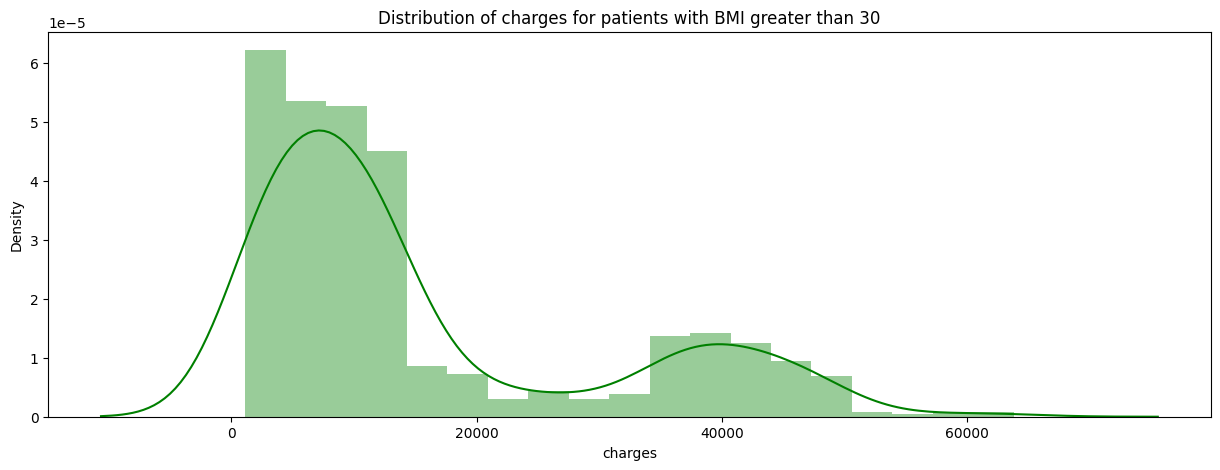

In [100]:
plt.figure(figsize=(15,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'g')
plt.show()

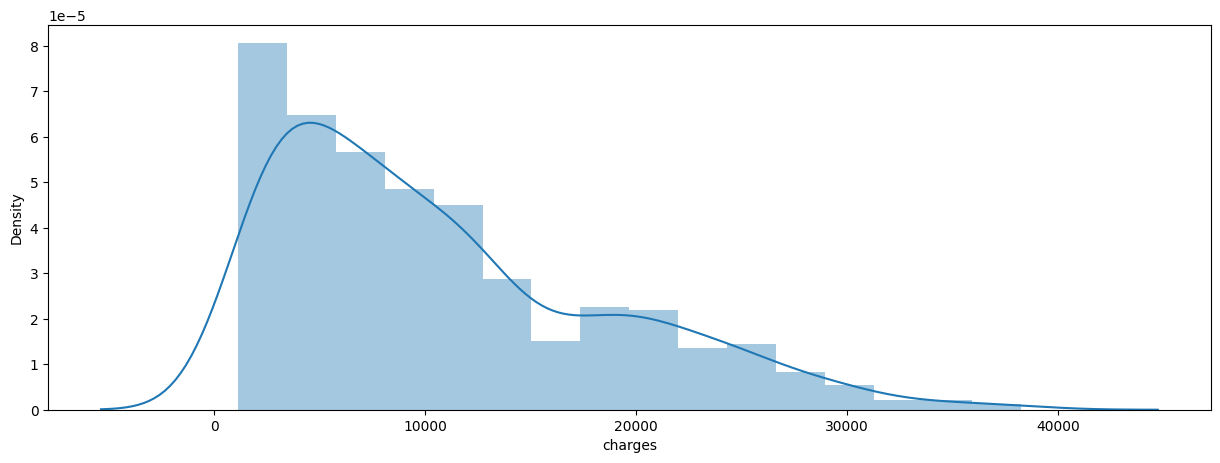

In [101]:
plt.figure(figsize=(15,5))
sns.distplot(df[(df.bmi<30)]['charges'])
plt.show()

# Label-Encoding

In [102]:
#label encoding is done by importing the label encoder from library
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [103]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


The label has been encoded in this order

# Train Test Split

In [104]:
x=df.drop(['charges'],axis=1)
y=df.charges

In [105]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [106]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Pre-Processing

In [107]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_x=sc.fit_transform(x)

In [108]:
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,random_state=0)

In [110]:
#from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Splitting the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Rest of the code for fitting the classifier


In [148]:
x_train

array([[-0.51314879, -1.0105187 , -0.17608483, -0.07876719, -0.5074631 ,
         0.43849455],
       [ 1.55168573, -1.0105187 , -1.41462066, -0.90861367, -0.5074631 ,
        -1.37232554],
       [-1.43876426,  0.98959079, -0.99466679, -0.07876719, -0.5074631 ,
         1.34390459],
       ...,
       [ 0.05646073,  0.98959079, -0.91592544, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.43876426,  0.98959079,  0.79833938, -0.90861367, -0.5074631 ,
        -0.46691549],
       [-0.4419476 , -1.0105187 , -1.99533811, -0.07876719, -0.5074631 ,
         1.34390459]])

In [149]:
x_test

array([[ 0.91087502,  0.98959079, -0.0760177 , -0.07876719, -0.5074631 ,
         1.34390459],
       [ 0.55486907, -1.0105187 , -0.21217462, -0.07876719, -0.5074631 ,
         0.43849455],
       [ 0.62607026,  0.98959079,  1.62430334,  0.75107928,  1.97058663,
        -0.46691549],
       ...,
       [ 0.83967383,  0.98959079, -0.10390526, -0.07876719, -0.5074631 ,
         0.43849455],
       [-1.1539595 ,  0.98959079,  1.05588922,  1.58092576, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [150]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
574     13224.05705
1174     4433.91590
1327     9377.90470
817      3597.59600
1337    29141.36030
Name: charges, Length: 335, dtype: float64

In [151]:
y_train

1075     4562.84210
131     13616.35860
15       1837.23700
1223    26125.67477
1137     3176.28770
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1003, dtype: float64

In [153]:
print(x_train.shape)

(1003, 6)


# Model Building

## Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lr=LinearRegression()

In [157]:
lr.fit(x_train,y_train)

LinearRegression()

In [158]:
x_train_predict=lr.predict(x_train)

In [159]:
x_test_predict=lr.predict(x_test)

In [160]:
lr.score(x_train,y_train)

0.7337162219022217

In [161]:
lr.score(x_test,y_test)

0.7962732059725786

In [224]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## Evaluation Metrics

### R2 Score

In [164]:
train_Score=r2_score(y_train,x_train_predict)

In [165]:
train_Score

0.7337162219022217

In [166]:
test_score=r2_score(y_test,x_test_predict)

In [167]:
test_score

0.7962732059725786

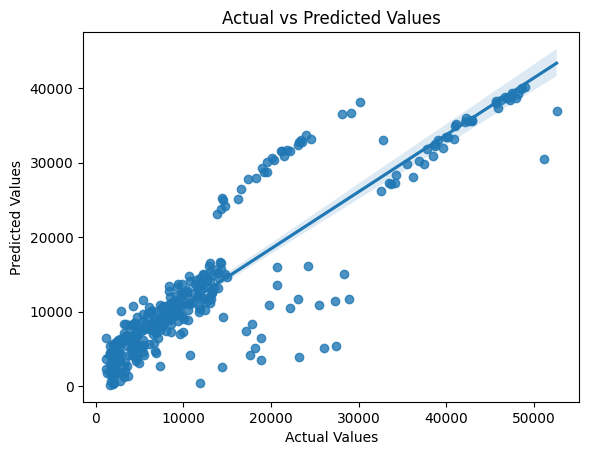

In [169]:
import seaborn as sns

results = pd.DataFrame({'Actual': y_test, 'Predicted': x_test_predict})
sns.regplot(data=results, x='Actual', y='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


### Mean Squared Error

#### Training 

In [170]:
MSE_train=mean_squared_error(y_train,x_train_predict)

In [171]:
MSE_train

38050102.806068085

#### Test

In [172]:
MSE_test=mean_squared_error(y_test,x_test_predict)

In [173]:
MSE_test

32073628.56010921

### Root Mean Squared Error

#### Testing

In [174]:
import math

In [175]:
RMSE_test=math.sqrt(mean_squared_error(y_test,x_test_predict))

In [176]:
RMSE_test

5663.358417062195

#### Training

In [177]:
RMSE_train=math.sqrt(mean_squared_error(y_train,x_train_predict))

In [178]:
RMSE_train

6168.476538503497

In [232]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

if (y_test >= 0).all() and (x_test_predict >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, x_test_predict))
    print("RMSLE for Test:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")



RMSLE for Test: 0.5446602450189125


### Mean Absolute Error

#### Train

In [179]:
MAE_train=mean_absolute_error(y_train,x_train_predict)

In [180]:
MAE_train

4232.22118590043

#### Test

In [181]:
MAE_test=mean_absolute_error(y_test,x_test_predict)

In [182]:
MAE_test

3998.271540886974

In [183]:
print('intercept:', lr.intercept_) ## c value

intercept: 13273.164915855477


In [184]:
print('slope:', lr.coef_)

slope: [ 3.51872708e+03  1.82536077e+00  1.96825828e+03  5.42446655e+02
  9.52447231e+03 -3.76894428e+02]


## KNeighbors Regressor

In [186]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] 
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred=model.predict(x_test) 
    error = np.sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6416.3391502989225
RMSE value for k=  2 is: 5316.667230568597
RMSE value for k=  3 is: 5059.843046100291
RMSE value for k=  4 is: 4886.546329277099
RMSE value for k=  5 is: 4879.477199848586
RMSE value for k=  6 is: 4782.31720147
RMSE value for k=  7 is: 4744.248765423277
RMSE value for k=  8 is: 4659.791482880308
RMSE value for k=  9 is: 4663.241084496165
RMSE value for k=  10 is: 4746.870177860722
RMSE value for k=  11 is: 4766.785862079913
RMSE value for k=  12 is: 4707.5631200316575
RMSE value for k=  13 is: 4730.096763878315
RMSE value for k=  14 is: 4710.9946967634605
RMSE value for k=  15 is: 4718.940423874324
RMSE value for k=  16 is: 4769.999952180891
RMSE value for k=  17 is: 4787.140318464831
RMSE value for k=  18 is: 4746.861348374747
RMSE value for k=  19 is: 4768.534177487757
RMSE value for k=  20 is: 4802.3553450954505


## Random Forest Regressor

In [188]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [190]:
prediction=rfr.predict(x_test)

In [191]:
prediction

array([10850.0715841 ,  9456.3550308 , 45086.847846  , 13303.2377035 ,
       10015.6982896 , 10568.128484  ,  2326.3185105 , 12860.0410608 ,
        7780.2777125 ,  7209.6345155 ,  7168.5916759 , 18457.1539027 ,
        7917.0976116 ,  5161.3514633 , 22851.5882258 , 13839.5186785 ,
       12857.4854072 ,  8084.9774248 ,  6474.657353  , 34037.0726068 ,
       24039.4417715 , 16670.9945675 , 10644.6482231 , 26699.4467798 ,
        2480.5669156 , 10836.6781157 ,  8448.7664421 ,  7897.2795827 ,
        4100.9666581 , 10304.5928696 ,  7813.5062936 , 48773.3106175 ,
       13956.4574775 , 11891.1000987 , 16147.1954626 ,  4136.3264641 ,
        8742.4540647 , 37639.107247  , 39725.869924  ,  5038.0333573 ,
        9733.460315  ,  3566.0057865 , 20760.0528617 , 47873.672601  ,
       36573.5511605 ,  6191.4300573 , 14183.274622  ,  6737.270469  ,
        7202.7474386 , 14083.0507456 ,  3973.5768562 , 14225.9025615 ,
       28151.2237814 , 48338.6427739 , 11682.8574675 , 11327.5166095 ,
      

In [192]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
574     13224.05705
1174     4433.91590
1327     9377.90470
817      3597.59600
1337    29141.36030
Name: charges, Length: 335, dtype: float64

In [193]:
rfr.score(x_test,y_test)

0.8693392406322076

In [194]:
rfr.score(x_train,y_train)

0.9747066191724472

In [195]:
from sklearn.metrics import r2_score

In [196]:
r2_score(y_test,prediction)

0.8693392406322076

## Hyperparameter tuning

In [197]:
from sklearn.model_selection import RandomizedSearchCV

In [198]:
grid={'n_estimators':[int(x) for x in np.linspace(start=100,stop=1200,num=12)],
      'max_features':['auto','sqrt'],
      'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
      'min_samples_split':[2,5,10,15,100],
      'min_samples_leaf':[1,2,5,10]}

In [199]:
hyper_tuning=RandomizedSearchCV(estimator=rfr,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=5,random_state=2)

In [200]:
hyper_tuning.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-19535385.962 total time=   1.4s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-20938924.019 total time=   1.3s
[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-35340801.377 total time=   1.2s
[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-25561937.770 total time=   1.3s
[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800;, score=-38534490.905 total time=   1.4s
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000;, score=-18453940.264 total time=   2.5s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=5)

In [201]:
hyper_tuning.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 10}

In [202]:
rfr2=RandomForestRegressor(n_estimators=300,min_samples_split=5,min_samples_leaf=10,max_features='auto',max_depth=10)

In [203]:
rfr2.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=10,
                      min_samples_split=5, n_estimators=300)

In [204]:
prediction2=rfr2.predict(x_test)

In [205]:
rfr2.score(x_train,y_train)

0.8797727959966153

In [206]:
rfr2.score(x_test,y_test)

0.901296048259858

In [207]:
print(r2_score(y_test,prediction2))

0.901296048259858


**The score has improved after hyper parameter tuning the Random Forest Regressor Algorithm**

**Yet it is Underfitting**

# Gradient Boosting

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [209]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [210]:
gbrpred=gbr.predict(x_test)

In [211]:
gbrpred

array([12082.70115985,  9671.7205882 , 46362.57791373, 13702.1875342 ,
       10258.05421121,  5130.23872255,  2563.96170578, 14261.50180334,
        8085.42247772,  6973.39590684,  6564.59149385, 12469.39100521,
        8770.94891776,  5775.33232431, 21506.97843539, 11888.66108975,
       14819.00422644,  5940.60482546,  7337.98956008, 36421.30574338,
       24414.33517504, 14153.71134656, 11832.90105151, 25962.93365145,
        2906.41129638,  7941.11729849,  4740.1779865 ,  7873.49157034,
        4293.81164032, 10844.7351175 ,  7647.07960715, 48235.70808486,
       14631.25060395, 10893.97233744, 17044.53937687,  4932.5884947 ,
        9921.72261469, 36912.21040562, 38896.88598698,  2591.23419288,
        5430.42151468,  4346.84676312, 20088.5636907 , 47195.90109583,
       36604.50510993,  5901.12302524, 12024.98759558,  7522.33262938,
        5319.50293143, 12201.33747297,  4874.93979519,  5683.4674373 ,
       27402.8345815 , 45887.95475707, 10648.07826039,  7763.95731234,
      

In [212]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
574     13224.05705
1174     4433.91590
1327     9377.90470
817      3597.59600
1337    29141.36030
Name: charges, Length: 335, dtype: float64

In [213]:
print(r2_score(y_test,gbrpred))

0.8978744031648791


# Gradient Boosting Results

In [214]:
print('Gradient Boosting Training Score %.2f%% '%(gbr.score(x_train,y_train)*100))

Gradient Boosting Training Score 89.88% 


In [215]:
print('Gradient Boosting Testing Score %.2f%% '%(gbr.score(x_test,y_test)*100))

Gradient Boosting Testing Score 89.79% 


# Finding the Most Influencing Feature

In [243]:
selection=RandomForestRegressor()
selection.fit(x, y)
print(selection.feature_importances_)

[0.12917876 0.00633356 0.21191766 0.01884858 0.61972366 0.01399778]


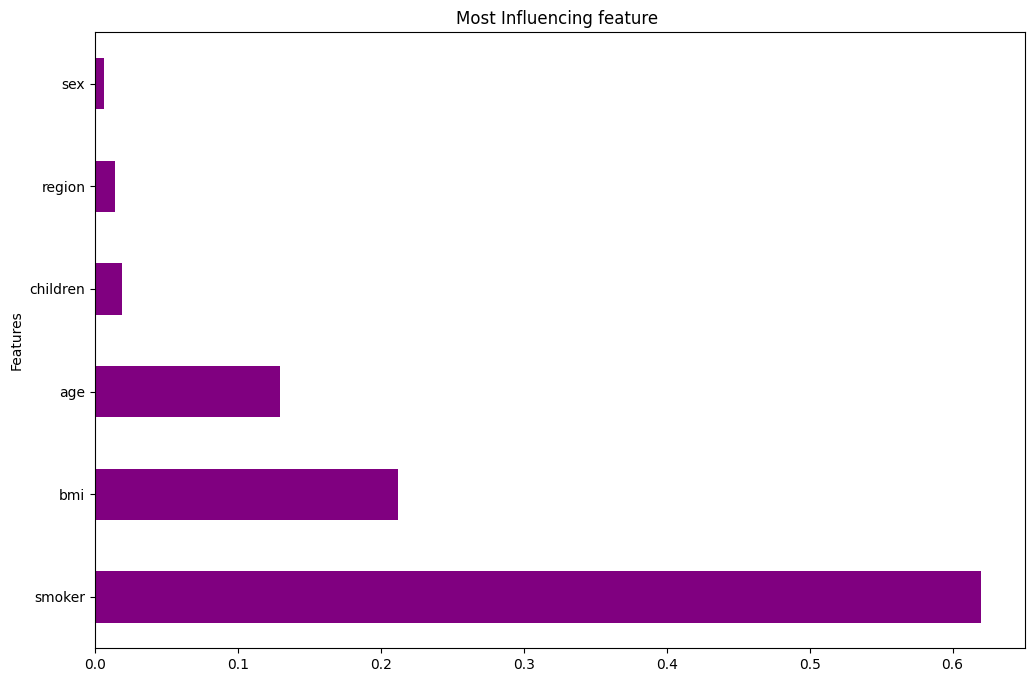

In [244]:
plt.figure(figsize = (12,8))
plt.title("Most Influencing feature ")
plt.ylabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh',color='purple')
plt.show()

## Predict charges for new customer

In [216]:
data={"age":35,"sex":1,"bmi":30.30,"children":0,"smoker":0,"region":4}
new_df=pd.DataFrame(data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,35,1,30.3,0,0,4


In [217]:
data={"age":45,"sex":1,"bmi":30.30,"children":4,"smoker":1,"region":2}
new_df2=pd.DataFrame(data,index=[0])
new_df2

,age,sex,bmi,children,smoker,region
0,45,1,30.3,4,1,2


In [218]:
predi=rfr.predict(new_df)
print("Cost of insurance:",predi[0])

Cost of insurance: 16778.553889400006


In [219]:
predi=rfr.predict(new_df2)
print("Cost of insurance:",predi[0])

Cost of insurance: 57800.48802009993


# Results and Insights:
Based on the evaluation metrics, the best-performing model is Gradient Boosting Regressor with accuracy of 89.79%, and its predictions are analyzed to gain prediction of cost of health insurance. Important features ie. smoker, bmi, age are contributing to higher insurance price are identified through feature importance analysis. 

# Future Work:

1. For future work, it might be beneficial to collect and incorporate more variables into the model. Factors such as lifestyle habits, medical history, and income could potentially improve the model's predictive power.
2. Further investigation into the identified clusters could also be valuable to provide more targeted predictions or interventions. For example, a separate model could be trained for each cluster or different insurance plans could be offered based on a person's cluster.